## Reading of ASCII files created for cam diagnostics tool

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
from glob import glob
import os
import helper_funcs as helpers
import ipywidgets as ipw

### 1. Paths and global settings (GLOB)  

Please change accordingly if you execute this notebook on your local machine.

#### 1.1. Paths (PATHS)

Here you can specify your paths.

In [2]:
#folder with ascii files
data_dir = "./data/michael_ascii_read/"
file_type = "webarchive"

# file containing additional information about variables (long names, can be interactively updated below)
varinfo_csv = "./data/var_info.csv"

# Config file for different groups
vargroups_cfg = "./data/varconfig.ini"

#directy to store results
output_dir = "./output/"

#### Global settings (SETUP)

In the following cells you can specify global default settings.

##### Define group of variables that you are interested in

Default group of variables. Variable groups can be defined in [varconfig.ini](https://github.com/jgliss/my_notebooks/blob/master/data/varconfig.ini). Use ``[group_name]`` to define a new group and add below all variables that should belong to the group in the desired display order (should be self-explanatory when looking at the file, I hope).

In [3]:
var_group = "test" #group_name (AS STRING, e.g. "test") from varconfig.ini (use None, if you want to use all)

##### Add data columns to index

Use the following list to specify table columns that should be added to the multiindex (Ada, here is where you can add "Obs").

In [4]:
add_to_index = ["Obs"] #NEEDS TO BE A LIST, EVEN FOR ONLY ONE ITEM

##### Define which parts of index should be unstacked

The following list can be used to specify how the final lists are displayed. The items in the list need to be names of sub-indices in the the Multiindex of the originally loaded file (i.e. "Run", "Years", "Variable", "Description") or data columns that were added to index (previous option). 

All values specified here will be unstacked, i.e. put from the original row into a column index representation (makes table view wider).

In [5]:
unstack_indices = ["Run", "Years"]

### 2. Importing and editing supplementary information

Let's begin with reading additional variable information from the file ``varinfo_csv``. Note that this is not strictly required but helps us below to display the results in a more intuitive manner, when analysing the data.

Note that the following method makes sure the CSV file exists, i.e. if it has not been created before, the information is loaded from Michaels Excel table and then saved at ``varinfo_csv``.

In [6]:
var_info_dict = helpers.load_varinfo(varinfo_csv)

The following cell opens an interactive widget that can be used to edit the information available for each variable (stored in file ``varinfo_csv``, see previous cell).

In [7]:
from my_widgets import EditDictCSV

edit_config = EditDictCSV(varinfo_csv)
#show
edit_config()

Now update to the current selection (run everything below if you change the previous cell).

In [8]:
var_info_dict = edit_config.var_dict

### 3. Search and load ASCII files, either using .asc or .webarchive file type (GET_FILES)

The following cell finds all files in folder ``data_dir``.

In [9]:
files = sorted(glob(data_dir + "*.{}".format(file_type)))
for file in files:
    print(file)    

./data/michael_ascii_read/N1850C53CLM45L32_f09_tn11_191017 (yrs 71-100).webarchive
./data/michael_ascii_read/N1850_f09_tn14_230218 (yrs 1-20).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r227_ctrl (yrs 185-215).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r227_ctrl (yrs 310-340).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r227_ctrl (yrs 80-110).webarchive
./data/michael_ascii_read/N1850_f19_tn14_r265_ctrl_20180411 (yrs 90-120).webarchive


##### 3.1 Shortcuts for Run IDs (optional may also be changed interactively below)

Define list of shortnames for model runs or define a prefix. If undefined (i.e. empty list and ``None``), the original names are used.

In [10]:
#either
run_ids = list("ABCD") #renames the first 4 runs
#or
run_id_prefix = "Run"


### 4. Importing multiple result files and concatenating them into one Dataframe (LOAD_FILES)

In the following, we load all files into one `Dataframe`. 

To do this, a custom method `read_and_merge_all` was defined in [helper_funcs.py](https://github.com/jgliss/my_py3_scripts/blob/master/notebooks/helper_funcs.py). The method basically loops over all files and calls the method ``read_file_custom``, which you can also find in [helper_funcs.py](https://github.com/jgliss/my_py3_scripts/blob/master/notebooks/helper_funcs.py). 

In [11]:
merged = helpers.read_and_merge_all(file_list=files, var_info_dict=var_info_dict, replace_runid_prefix=run_id_prefix)
merged

/home/jonasg/github/my_notebooks/helper_funcs.py:152: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.test_case = pd.Series(mapping)


Flag     Model       Obs  \
Run  Years  Variable           Description                                     
Run1 71-100 RESTOM             TOmodel net flux      1.0    -0.489     0.000   
            RESSURF            SRF net flux          1.0    -0.489     0.000   
            RESTOA_CERES-EBAF  TOA  net flux         1.0     1.529     0.992   
            RESTOA_ERBE                              0.0     1.529     0.059   
            SOLIN_CERES-EBAF                         0.0   340.206   340.054   
            SOLIN_CERES                              0.0   340.206   341.479   
            CLDTOT_ISCCP       Total cloud cover     1.0    63.621    66.800   
            CLDTOT_CLOUDSAT                          0.0    63.621    66.824   
            FLDS_ISCCP         LW down SRF           1.0   338.280   343.347   
            FLNS_ISCCP         LW net SRF            1.0    55.819    49.425   
            FLUT_CERES-EBAF    LW up Top             1.0   238.148   239.574   
            FLUT_CERES                               0.0   238.148   238.963   
            FLUT_ERBE                                0.0   238.148   233.946   
            FLUTC_CERES-EBAF   LW up Top Clearsky    1.0   261.783   266.051   
            FLUTC_CERES                              0.0   261.783   266.878   
            FLUTC_ERBE                               0.0   261.783   264.429   
            FLNT_CAM                                 0.0   236.838       NaN   
            FSDS_ISCCP         SW down SRF           1.0   187.801   189.390   
            FSNS_ISCCP         SW net SRF            1.0   163.679   165.893   
            FSNS_LARYEA                              0.0   163.679   154.089   
            FSNTOA_CERES-EBAF                        0.0   239.677   240.566   
            FSNTOA_CERES       SW net TOA            1.0   239.677   244.691   
            FSNTOA_ERBE                              0.0   239.677   234.004   
            FSNTOAC_CERES-EBAF                       0.0   287.999   287.638   
            FSNTOAC_CERES      SW net TOA clearsky   1.0   287.999   294.702   
            FSNTOAC_ERBE                             0.0   287.999   289.329   
            FSNT_CAM                                 0.0   236.348       NaN   
            LHFLX_JRA25        Lat Heat Flux         1.0    87.904    87.935   
            LHFLX_ERA40                              0.0    87.904    82.367   
            LHFLX_WHOI                               0.0    87.904    89.083   
...                                                  ...       ...       ...   
Run4 90-120 PRECT_GPCP         Precipitation         1.0     2.918     2.674   
            PREH2O_NVAP                              0.0    25.733    24.597   
            PREH2O_AIRS                              0.0    25.733    20.425   
            PREH2O_JRA25                             0.0    25.733    20.425   
            PREH2O_ERAI                              0.0    25.733    24.247   
            PREH2O_ERA40       Precipitable water    1.0    25.733    24.948   
            PSL_JRA25          SeaLev pressure       1.0  1011.614  1011.280   
            PSL_ERAI                                 0.0  1011.614  1011.362   
            SHFLX_JRA25        Sens Heat Flux        1.0    22.229    19.372   
            SHFLX_NCEP                               0.0    22.229    15.795   
            SHFLX_LARYEA                             0.0    22.229    13.236   
            STRESS_MAG_ERS                           0.0     0.063     0.064   
            STRESS_MAG_LARYEA                        0.0     0.063     0.071   
            STRESS_MAG_JRA25                         0.0     0.063     0.080   
            SWCF_CERES-EBAF    SW Cloud Forc         1.0   -48.959   -47.071   
            SWCF_CERES                               0.0   -48.959   -48.586   
            SWCF_ERBE                                0.0   -48.959   -54.163   
            AODVIS                                  

### 5. Rearranging and restructuring of the imported data (REARRANGE)

#### 5.1 Computing RMSE relative error (GET_RMSE_REL)

In the following we extract the subset containing the *RSME* information of the flagged variables for all runs in order to compute the relative error for each run based on the average *RMSE* of all runs:

$$\frac{RMSE_{Run}\,-\,\overline{RMSE_{All\,Runs}}}{\overline{RMSE_{All\,Runs}}}$$


In [12]:
merged = helpers.calc_and_add_relerror(merged, colname="RMSE", unstack_indices=unstack_indices)
merged

Flag     Model       Obs  \
Run  Years  Variable           Description                                     
Run1 71-100 RESTOM             TOmodel net flux      1.0    -0.489     0.000   
            RESSURF            SRF net flux          1.0    -0.489     0.000   
            RESTOA_CERES-EBAF  TOA  net flux         1.0     1.529     0.992   
            RESTOA_ERBE                              0.0     1.529     0.059   
            SOLIN_CERES-EBAF                         0.0   340.206   340.054   
            SOLIN_CERES                              0.0   340.206   341.479   
            CLDTOT_ISCCP       Total cloud cover     1.0    63.621    66.800   
            CLDTOT_CLOUDSAT                          0.0    63.621    66.824   
            FLDS_ISCCP         LW down SRF           1.0   338.280   343.347   
            FLNS_ISCCP         LW net SRF            1.0    55.819    49.425   
            FLUT_CERES-EBAF    LW up Top             1.0   238.148   239.574   
            FLUT_CERES                               0.0   238.148   238.963   
            FLUT_ERBE                                0.0   238.148   233.946   
            FLUTC_CERES-EBAF   LW up Top Clearsky    1.0   261.783   266.051   
            FLUTC_CERES                              0.0   261.783   266.878   
            FLUTC_ERBE                               0.0   261.783   264.429   
            FLNT_CAM                                 0.0   236.838       NaN   
            FSDS_ISCCP         SW down SRF           1.0   187.801   189.390   
            FSNS_ISCCP         SW net SRF            1.0   163.679   165.893   
            FSNS_LARYEA                              0.0   163.679   154.089   
            FSNTOA_CERES-EBAF                        0.0   239.677   240.566   
            FSNTOA_CERES       SW net TOA            1.0   239.677   244.691   
            FSNTOA_ERBE                              0.0   239.677   234.004   
            FSNTOAC_CERES-EBAF                       0.0   287.999   287.638   
            FSNTOAC_CERES      SW net TOA clearsky   1.0   287.999   294.702   
            FSNTOAC_ERBE                             0.0   287.999   289.329   
            FSNT_CAM                                 0.0   236.348       NaN   
            LHFLX_JRA25        Lat Heat Flux         1.0    87.904    87.935   
            LHFLX_ERA40                              0.0    87.904    82.367   
            LHFLX_WHOI                               0.0    87.904    89.083   
...                                                  ...       ...       ...   
Run4 90-120 PRECT_GPCP         Precipitation         1.0     2.918     2.674   
            PREH2O_NVAP                              0.0    25.733    24.597   
            PREH2O_AIRS                              0.0    25.733    20.425   
            PREH2O_JRA25                             0.0    25.733    20.425   
            PREH2O_ERAI                              0.0    25.733    24.247   
            PREH2O_ERA40       Precipitable water    1.0    25.733    24.948   
            PSL_JRA25          SeaLev pressure       1.0  1011.614  1011.280   
            PSL_ERAI                                 0.0  1011.614  1011.362   
            SHFLX_JRA25        Sens Heat Flux        1.0    22.229    19.372   
            SHFLX_NCEP                               0.0    22.229    15.795   
            SHFLX_LARYEA                             0.0    22.229    13.236   
            STRESS_MAG_ERS                           0.0     0.063     0.064   
            STRESS_MAG_LARYEA                        0.0     0.063     0.071   
            STRESS_MAG_JRA25                         0.0     0.063     0.080   
            SWCF_CERES-EBAF    SW Cloud Forc         1.0   -48.959   -47.071   
            SWCF_CERES                               0.0   -48.959   -48.586   
            SWCF_ERBE                                0.0   -48.959   -54.163   
            AODVIS                                  

#### 5.2 Interactive manipulation of Dataframe (DF_EDIT)

The following table widget uses the loaded Dataframes and applies all settings that were defined above.  

In [13]:
from my_widgets import TableEditor
edit = TableEditor(df=merged, 
                   save_dir=output_dir, #defined above
                   preconfig_file=vargroups_cfg, #defined above
                   default_group=var_group,
                   new_run_names=run_ids,
                   add_to_index_vars=add_to_index,
                   unstack_indices=unstack_indices)
                   
edit()

Now access the current selection and continue.

In [14]:
selection = edit.df_edit
selection["Bias"].columns.names

FrozenList(['Run', 'Years'])

In [15]:
len(selection.columns.levels[0])

5

#### 5.3 Extracting the Bias of each model run relative to the observations (GET_BIAS)

Retrieving a table that illustrates the Bias of each run for each flagged variable is straight forward. We just extract the `Bias` column from our flagged frame:

In [16]:
bias = selection["Bias"]
bias

Run                                             A      B       C          \
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -3.203  1.762   1.720   1.411   
CLDTOT_ISCCP    Total cloud cover  66.800  -3.179  1.786   1.744   1.435   
FLDS_ISCCP      LW down SRF        343.347 -5.066 -1.799  10.514  11.499   
PREH2O_ERAI                        24.247  -0.273  0.191   3.844   4.138   
RESTOM          TOmodel net flux   0.000   -0.489  0.987   0.468   0.327   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -1.252  1.774   1.266   1.466   
U_200_JRA25     Zonal Wind JRA25   15.565   1.006  1.825   3.209   3.218   
Z3_500_NCEP                        56.581  -0.234 -0.070   0.298   0.336   

Run                                                    D  
Years                                      80-110 90-120  
Variable        Description       Obs                     
CLDTOT_CLOUDSAT                    66.824   2.133  3.923  
CLDTOT_ISCCP    Total cloud cover  66.800   2.157  3.947  
FLDS_ISCCP      LW down SRF        343.347  5.162  4.507  
PREH2O_ERAI                        24.247   2.624  1.486  
RESTOM          TOmodel net flux   0.000    0.647 -0.075  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   1.083 -1.888  
U_200_JRA25     Zonal Wind JRA25   15.565   3.340  2.304  
Z3_500_NCEP                        56.581   0.133  0.005

#### 5.4 Extracting the RMSE error of each model run relative to the observations (GET_RMSE_ERR)

In section 5.1 we computed and added the relative RMSE error as a new column to the original table. These data can now be accessed as simply as the ``Bias`` table:

In [17]:
rmse_err_rel = selection["RMSE_ERR"]
rmse_err_rel

Run                                                A         B         C  \
Years                                         71-100      1-20   185-215   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -0.079172 -0.017569  0.030123   
CLDTOT_ISCCP    Total cloud cover  66.800  -0.089645 -0.044782  0.044541   
FLDS_ISCCP      LW down SRF        343.347 -0.100193 -0.044087  0.051809   
PREH2O_ERAI                        24.247  -0.441220 -0.455730  0.432040   
RESTOM          TOmodel net flux   0.000         NaN       NaN       NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071   0.022955 -0.122700  0.035142   
U_200_JRA25     Zonal Wind JRA25   15.565  -0.322835 -0.209790  0.200831   
Z3_500_NCEP                        56.581  -0.105442 -0.414966  0.329932   

Run                                                                    D  
Years                                        310-340    80-110    90-120  
Variable        Description       Obs                                     
CLDTOT_CLOUDSAT                    66.824   0.036369  0.030880 -0.000631  
CLDTOT_ISCCP    Total cloud cover  66.800   0.051455  0.034652  0.003779  
FLDS_ISCCP      LW down SRF        343.347  0.099944  0.041161 -0.048633  
PREH2O_ERAI                        24.247   0.515546  0.157536 -0.208173  
RESTOM          TOmodel net flux   0.000         NaN       NaN       NaN  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   0.046636  0.029792 -0.011824  
U_200_JRA25     Zonal Wind JRA25   15.565   0.204710  0.201108 -0.074024  
Z3_500_NCEP                        56.581   0.442177  0.112245 -0.363946

### 6. Conditional formatting of tables (Dataframes) (VISUALISE)

This section illustrates, how we can perform conditional formatting of the color tables. As discussed above, we can apply background colour gradients to the data. In the example above we had a multiindex data type specifying model run, year-range and variable in stacked format (long table) and the four data columns specifying results from model and observation as well as bias and RMSE. 

Now, in the following we illustrate how we can apply this colour highlighting for the two unstacked tables that we just created and that contain Bias and relative error. 

In [18]:
bias

Run                                             A      B       C          \
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -3.203  1.762   1.720   1.411   
CLDTOT_ISCCP    Total cloud cover  66.800  -3.179  1.786   1.744   1.435   
FLDS_ISCCP      LW down SRF        343.347 -5.066 -1.799  10.514  11.499   
PREH2O_ERAI                        24.247  -0.273  0.191   3.844   4.138   
RESTOM          TOmodel net flux   0.000   -0.489  0.987   0.468   0.327   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -1.252  1.774   1.266   1.466   
U_200_JRA25     Zonal Wind JRA25   15.565   1.006  1.825   3.209   3.218   
Z3_500_NCEP                        56.581  -0.234 -0.070   0.298   0.336   

Run                                                    D  
Years                                      80-110 90-120  
Variable        Description       Obs                     
CLDTOT_CLOUDSAT                    66.824   2.133  3.923  
CLDTOT_ISCCP    Total cloud cover  66.800   2.157  3.947  
FLDS_ISCCP      LW down SRF        343.347  5.162  4.507  
PREH2O_ERAI                        24.247   2.624  1.486  
RESTOM          TOmodel net flux   0.000    0.647 -0.075  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   1.083 -1.888  
U_200_JRA25     Zonal Wind JRA25   15.565   3.340  2.304  
Z3_500_NCEP                        56.581   0.133  0.005

#### 6.2 How we want it (VIS_RIGHT)

In the following, we use a custom display method `my_table_display` (that is defined in [helper_funcs.py](https://github.com/jgliss/my_py3_scripts/blob/master/notebooks/helper_funcs.py)) in order to perform colour formatting considering all rows and columns at the same time and furthermore, using a diverging colour map that is dynamically shifted such that value 0 corresponds to the colour white (method `shifted_color_map`) also if `-vmin != vmax` (like usually).

In [19]:
from helper_funcs import my_table_display
my_table_display(bias)

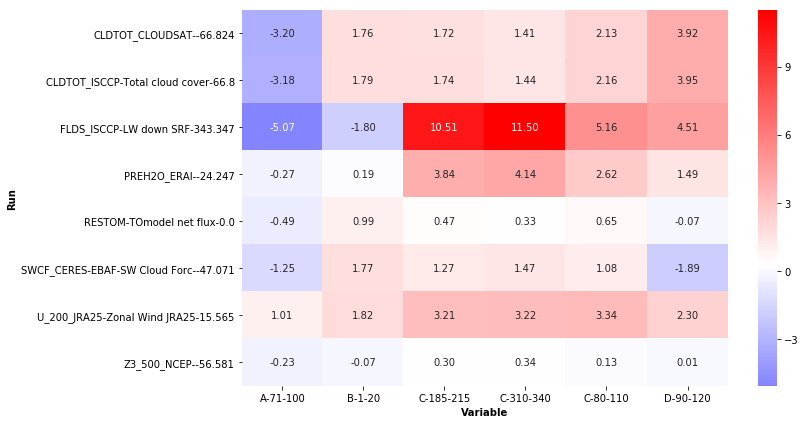

In [20]:
from helper_funcs import df_to_heatmap

ax = df_to_heatmap(bias, figsize=(12,6))
ax.set_xlabel("Variable", weight="bold")
ax.set_ylabel("Run", weight="bold")
ax.figure.tight_layout()
ax.figure.savefig(os.path.join(output_dir, "bias_table.png"))

Now for the typical RMSE error

In [21]:
my_table_display(rmse_err_rel)

/home/jonasg/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


### 7. Concatenate and save results (Bias and typical RMSE) as table (EXPORT)

In the following, the two result tables ``bias_table`` and ``typical_rmse`` are merged into one result table and then saved both as excel table and as csv file.

In [22]:
result = pd.concat([bias, rmse_err_rel],axis=1, keys=["Bias", "RMSE relative Error"])
result

Bias                         \
Run                                             A      B       C           
Years                                      71-100   1-20 185-215 310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -3.203  1.762   1.720   1.411   
CLDTOT_ISCCP    Total cloud cover  66.800  -3.179  1.786   1.744   1.435   
FLDS_ISCCP      LW down SRF        343.347 -5.066 -1.799  10.514  11.499   
PREH2O_ERAI                        24.247  -0.273  0.191   3.844   4.138   
RESTOM          TOmodel net flux   0.000   -0.489  0.987   0.468   0.327   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -1.252  1.774   1.266   1.466   
U_200_JRA25     Zonal Wind JRA25   15.565   1.006  1.825   3.209   3.218   
Z3_500_NCEP                        56.581  -0.234 -0.070   0.298   0.336   

                                                         RMSE relative Error  \
Run                                                    D                   A   
Years                                      80-110 90-120              71-100   
Variable        Description       Obs                                          
CLDTOT_CLOUDSAT                    66.824   2.133  3.923           -0.079172   
CLDTOT_ISCCP    Total cloud cover  66.800   2.157  3.947           -0.089645   
FLDS_ISCCP      LW down SRF        343.347  5.162  4.507           -0.100193   
PREH2O_ERAI                        24.247   2.624  1.486           -0.441220   
RESTOM          TOmodel net flux   0.000    0.647 -0.075                 NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071   1.083 -1.888            0.022955   
U_200_JRA25     Zonal Wind JRA25   15.565   3.340  2.304           -0.322835   
Z3_500_NCEP                        56.581   0.133  0.005           -0.105442   

                                                                          \
Run                                                B         C             
Years                                           1-20   185-215   310-340   
Variable        Description       Obs                                      
CLDTOT_CLOUDSAT                    66.824  -0.017569  0.030123  0.036369   
CLDTOT_ISCCP    Total cloud cover  66.800  -0.044782  0.044541  0.051455   
FLDS_ISCCP      LW down SRF        343.347 -0.044087  0.051809  0.099944   
PREH2O_ERAI                        24.247  -0.455730  0.432040  0.515546   
RESTOM          TOmodel net flux   0.000         NaN       NaN       NaN   
SWCF_CERES-EBAF SW Cloud Forc     -47.071  -0.122700  0.035142  0.046636   
U_200_JRA25     Zonal Wind JRA25   15.565  -0.209790  0.200831  0.204710   
Z3_500_NCEP                        56.581  -0.414966  0.329932  0.442177   

                                                                
Run                                                          D  
Years                                         80-110    90-120  
Variable        Description       Obs                           
CLDTOT_CLOUDSAT                    66.824   0.030880 -0.000631  
CLDTOT_ISCCP    Total cloud cover  66.800   0.034652  0.003779  
FLDS_ISCCP      LW down SRF        343.347  0.041161 -0.048633  
PREH2O_ERAI                        24.247   0.157536 -0.208173  
RESTOM          TOmodel net flux   0.000         NaN       NaN  
SWCF_CERES-EBAF SW Cloud Forc     -47.071   0.029792 -0.011824  
U_200_JRA25     Zonal Wind JRA25   15.565   0.201108 -0.074024  
Z3_500_NCEP                        56.581   0.112245 -0.363946

Now save both tables as excel file.

In [23]:
writer = pd.ExcelWriter('{}/result.xlsx'.format(output_dir))
result.to_excel(writer)
writer.save()
writer.close()